In [1]:
import pingouin as pg
import seaborn as sns
sns.set()

In [2]:
# 利用可能なデータセット一覧
pg.list_dataset()

,description,useful,ref
dataset,,,
ancova,Teaching method with family income as covariate,ANCOVA,www.real-statistics.com
anova,Pain threshold per hair color,anova - pairwise_tukey,McClave and Dietrich 1991
anova2,Fertilizer impact on the yield of crops,anova,www.real-statistics.com
anova2_unbalanced,Diet and exercise impact,anova,http://onlinestatbook.com/2/analysis_of_varian...
anova3,Cholesterol in different groups,anova,Pingouin
anova3_unbalanced,Cholesterol in different groups,anova,Pingouin
chi2_independence,Patients' attributes and heart conditions,chi2_independence,https://archive.ics.uci.edu/ml/datasets/Heart+...
chi2_mcnemar,Responses to 2 athlete's foot treatments,chi2_mcnemar,http://www.stat.purdue.edu/~tqin/system101/me...
circular,Orientation tuning properties of three neurons,circular statistics,Berens 2009


## ANOVA

In [3]:
df = pg.read_dataset('anova')
df.head()

,Subject,Hair color,Pain threshold
0,1,Light Blond,62
1,2,Light Blond,60
2,3,Light Blond,71
3,4,Light Blond,55
4,5,Light Blond,48


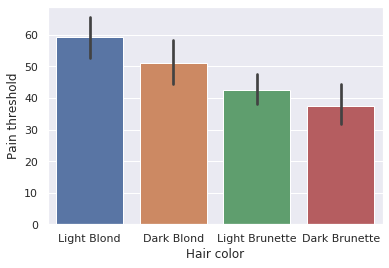

In [4]:
sns.barplot(x='Hair color', y='Pain threshold', data=df)

In [5]:
# 分散の等質性の検定
pg.homoscedasticity(data=df, dv='Pain threshold', group='Hair color')

,W,pval,equal_var
levene,0.392743,0.760016,True


In [6]:
# 一元配置分散分析
pg.anova(data=df, dv='Pain threshold', between='Hair color')

,Source,ddof1,ddof2,F,p-unc,np2
0,Hair color,3,15,6.791407,0.004114,0.575962


In [7]:
# Tukeyの多重比較
pg.pairwise_tukey(data=df, dv='Pain threshold', between='Hair color')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Dark Blond,Dark Brunette,51.2,37.4,13.8,5.168623,2.669957,0.047668,1.525213
1,Dark Blond,Light Blond,51.2,59.2,-8.0,5.168623,-1.547801,0.413344,-0.884182
2,Dark Blond,Light Brunette,51.2,42.5,8.7,5.482153,1.586968,0.391353,0.946285
3,Dark Brunette,Light Blond,37.4,59.2,-21.8,5.168623,-4.217758,0.001000,-2.409395
4,Dark Brunette,Light Brunette,37.4,42.5,-5.1,5.482153,-0.930291,0.759120,-0.554719
5,Light Blond,Light Brunette,59.2,42.5,16.7,5.482153,3.046249,0.017775,1.816432


## 相関分析

In [8]:
# Load an example dataset with the personality scores of 500 participants
df = pg.read_dataset('pairwise_corr')
df.head()

,Subject,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness
0,1,2.47917,4.20833,3.93750,3.95833,3.45833
1,2,2.60417,3.18750,3.95833,3.39583,3.22917
2,3,2.81250,2.89583,3.41667,2.75000,3.50000
3,4,2.89583,3.56250,3.52083,3.16667,2.79167
4,5,3.02083,3.33333,4.02083,3.20833,2.85417


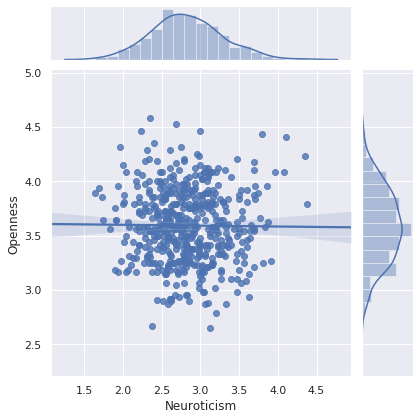

In [9]:
# 1bis. Visual inspection with a histogram + scatter plot (optional)
sns.jointplot(data=df, x='Neuroticism', y='Openness', kind='reg')

In [10]:
# 正規性を検定
pg.multivariate_normality(df[['Neuroticism', 'Openness']])

HZResults(hz=0.811566753889395, pval=0.284819872354212, normal=True)

In [11]:
# 相関分析
pg.corr(df['Neuroticism'], df['Openness'], method='pearson')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,500,-0.010383,"[-0.1, 0.08]",0.000108,-0.003916,0.816854,0.058,0.056138


## ノンパラメトリック検定

In [12]:
# Load an example dataset comparing pain threshold as a function of hair color
df = pg.read_dataset('anova')
df.head()

,Subject,Hair color,Pain threshold
0,1,Light Blond,62
1,2,Light Blond,60
2,3,Light Blond,71
3,4,Light Blond,55
4,5,Light Blond,48


In [13]:
# There are 4 independent groups in our dataset, we'll therefore use the Kruskal-Wallis test:
pg.kruskal(data=df, dv='Pain threshold', between='Hair color')

,Source,ddof1,H,p-unc
Kruskal,Hair color,3,10.58863,0.014172
